# 📘 USC Master in Artificial Intelligence — 2025  

This notebook corresponds to **Assignment — P1 Part-of-Speech (PoS) tagging**  for the Natural Language Understanding course of the USC Artificial Intelligence Master 2025. 

**Course:** Natural Language Understanding 

**Authors:** 
 - Gian Paolo Bulleddu ([gianpaolo.bulleddu@rai.usc.es])
 - Francisco --- ([])
-  Santiago .. ([])

**Teachers** 
 - Alejandro Catalá  ([alejandro.catala@usc.es])
 - Mario Izquierdo ([mario.izquierdo.alvarez@usc.es])

# Imports

In [13]:
import pickle
from NLUutils import parse_conllu_basic, build_tokenizer, build_tag_vocab, encode_sentences, encode_tags, debug_tokenizer, debug_tags
from posTaggerClass import PosTagger

In [ ]:
MAX_LEN = 128                       # max sentence lenght
TOKENIZER_PATH = './tokenizer_es.pkl'  # tokenizer saving path
TAG2IDX_PATH = './tag2idx_es.pkl'      # tag2idx saving path
IDX2TAG_PATH = './idx2tag_es.pkl'      # idx2tag saving path

OOV_TOKEN = "[UNK]"
PAD_TOKEN = "[PAD]"

train_file = "./UD_Spanish-GSD-master/es_gsd-ud-train.conllu"
val_file   = "./UD_Spanish-GSD-master/es_gsd-ud-dev.conllu"
test_file  = "./UD_Spanish-GSD-master/es_gsd-ud-test.conllu"

train_sents, train_tags = parse_conllu_basic(train_file)
val_sents, val_tags     = parse_conllu_basic(val_file)
test_sents, test_tags   = parse_conllu_basic(test_file)

tokenizer, VOCAB_SIZE = build_tokenizer(train_sents,oov_token=OOV_TOKEN, pad_token=PAD_TOKEN)
tag2idx, idx2tag = build_tag_vocab(train_tags)

with open(TOKENIZER_PATH, "wb") as f:
    pickle.dump(tokenizer, f)
print(f" Tokenizer saved to {TOKENIZER_PATH}")   

with open(TAG2IDX_PATH, "wb") as f:
    pickle.dump(tag2idx, f)
print(f" tag2idx saved to {TAG2IDX_PATH}")      
    
with open(IDX2TAG_PATH, "wb") as f:
    pickle.dump(idx2tag, f)
print(f" idx2tag saved to {IDX2TAG_PATH}")    
 
DEBUG = True   # set to True to print tokenizer attributes
debug_tokenizer(tokenizer, debug=DEBUG)


X_train = encode_sentences(tokenizer, train_sents, MAX_LEN)
X_val   = encode_sentences(tokenizer, val_sents, MAX_LEN)
X_test  = encode_sentences(tokenizer, test_sents, MAX_LEN)

y_train = encode_tags(train_tags, tag2idx, MAX_LEN)
y_val   = encode_tags(val_tags, tag2idx, MAX_LEN)
y_test  = encode_tags(test_tags, tag2idx, MAX_LEN)

DEBUG = True   # set to True to print tokenizer attributes
debug_tags(tag2idx, idx2tag, y_encoded=y_train, debug=DEBUG)


 Tokenizer saved to ./tokenizer_es.pkl
 tag2idx saved to ./tag2idx_es.pkl
 idx2tag saved to ./idx2tag_it.pkl
==================== TOKENIZER DEBUG INFO  ====================
Vocabulary size: 42166
OOV token: [UNK]
Number of documents: 14178
Number of words considered (num_words): None

--- Top 10 words ---
 1. Word: '[UNK]          '  ID:    2  Count:    0  OOV: Yes
 2. Word: 'de             '  ID:    3  Count: 29421  OOV: 
 3. Word: ',              '  ID:    4  Count: 18805  OOV: 
 4. Word: 'el             '  ID:    5  Count: 17284  OOV: 
 5. Word: '.              '  ID:    6  Count: 13626  OOV: 
 6. Word: 'la             '  ID:    7  Count: 13444  OOV: 
 7. Word: 'en             '  ID:    8  Count: 11076  OOV: 
 8. Word: 'y              '  ID:    9  Count: 9162  OOV: 
 9. Word: 'a              '  ID:   10  Count: 7935  OOV: 
10. Word: 'que            '  ID:   11  Count: 6975  OOV: 

word_index (first 10): {'[UNK]': 2, 'de': 3, ',': 4, 'el': 5, '.': 6, 'la': 7, 'en': 8, 'y': 9, 'a': 10

# Buil/Train/Save Model

params {'lstm_units': 128, 'embedding_dim': 128, 'batch_size': 32, 'lstm_droput': 0.2, 'learning_rate': 0.001, 'input_dim': 42167, 'epochs': 50, 'patience': 3, 'model_path': 'pos_tag_es.keras', 'tokenizer_path': './tokenizer_es.pkl', 'tag2idx_path': './tag2idx_es.pkl', 'idx2tag_path': './idx2tag_it.pkl', 'max_len': 128, 'tag_size': 18, 'vocab_size': 42167, 'num_tags': 18, 'oov': '[UNK]'}
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 128, 128)          5397376   
                                                                 
 bidirectional_2 (Bidirecti  (None, 128, 256)          263168    
 onal)                                                           
                                                                

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

  1/444 [..............................] - ETA: 4:10:15 - loss: 2.8940 - accuracy: 0.0459

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 51/444 [==>...........................] - ETA: 35s - loss: 2.3772 - accuracy: 0.2935    

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 58/444 [==>...........................] - ETA: 33s - loss: 2.3185 - accuracy: 0.3194

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 61/444 [===>..........................] - ETA: 32s - loss: 2.2883 - accuracy: 0.3317

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

167/444 [==========>...................] - ETA: 16s - loss: 1.4121 - accuracy: 0.5912

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


171/444 [==========>...................] - ETA: 16s - loss: 1.3936 - accuracy: 0.5963

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

301/444 [===================>..........] - ETA: 7s - loss: 0.9619 - accuracy: 0.7201

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

444/444 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.7838

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - 31s -5776us/step - loss: 0.7388 - accuracy: 0.7838 - val_loss: 0.2279 - val_accuracy: 0.9293
Epoch 2/50
 18/444 [>.............................] - ETA: 12s - loss: 0.1831 - accuracy: 0.9469

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 33/444 [=>............................] - ETA: 11s - loss: 0.1773 - accuracy: 0.9490

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 38/444 [=>............................] - ETA: 12s - loss: 0.1769 - accuracy: 0.9490

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 49/444 [==>...........................] - ETA: 12s - loss: 0.1764 - accuracy: 0.9491

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 64/444 [===>..........................] - ETA: 2:46 - loss: 0.1736 - accuracy: 0.9497

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

233/444 [==============>...............] - ETA: 29s - loss: 0.1679 - accuracy: 0.9500

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

395/444 [=========================>....] - ETA: 4s - loss: 0.1610 - accuracy: 0.9513

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


415/444 [===========================>..] - ETA: 2s - loss: 0.1603 - accuracy: 0.9515

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - 13s 30ms/step - loss: 0.1595 - accuracy: 0.9516 - val_loss: 0.1906 - val_accuracy: 0.9377
Epoch 3/50
143/444 [========>.....................] - ETA: 1:02 - loss: 0.0966 - accuracy: 0.9698

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


333/444 [=====================>........] - ETA: 11s - loss: 0.0965 - accuracy: 0.9691 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


335/444 [=====================>........] - ETA: 11s - loss: 0.0965 - accuracy: 0.9691

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - 12s 28ms/step - loss: 0.0975 - accuracy: 0.9689 - val_loss: 0.1910 - val_accuracy: 0.9405
Epoch 4/50
  9/444 [..............................] - ETA: 15s - loss: 0.0667 - accuracy: 0.9802

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 29/444 [>.............................] - ETA: 14s - loss: 0.0729 - accuracy: 0.9774

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 39/444 [=>............................] - ETA: 4:45 - loss: 0.0724 - accuracy: 0.9773

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


202/444 [============>.................] - ETA: 38s - loss: 0.0706 - accuracy: 0.9775

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


369/444 [=======================>......] - ETA: 7s - loss: 0.0709 - accuracy: 0.9772

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - 14s 32ms/step - loss: 0.0718 - accuracy: 0.9768 - val_loss: 0.2104 - val_accuracy: 0.9363
Epoch 5/50
102/444 [=====>........................] - ETA: 1:37 - loss: 0.0514 - accuracy: 0.9839

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


234/444 [==============>...............] - ETA: 29s - loss: 0.0524 - accuracy: 0.9835

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


392/444 [=========================>....] - ETA: 5s - loss: 0.0542 - accuracy: 0.9825

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


436/444 [============================>.] - ETA: 0s - loss: 0.0547 - accuracy: 0.9824

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - ETA: 0s - loss: 0.0548 - accuracy: 0.9824

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


444/444 [==============================] - 41s 91ms/step - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.2213 - val_accuracy: 0.9352
save : Model saved to pos_tag_es.keras


/workspace/posTaggerClass.py:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


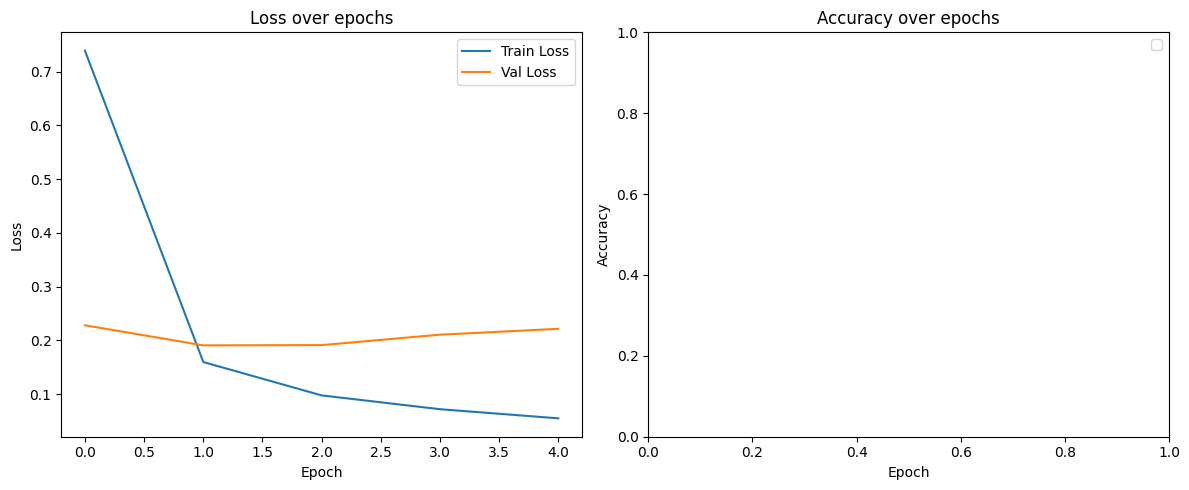

In [15]:
LSTM_UNITS = 128
EMB_DIM = 128
BATCH_SIZE = 32
LSTM_DROPOUT = 0.2
LEARNING_RATE = 0.001
EPOCHS = 50
PATIENCE = 3
MAX_LEN = 128
MODEL_PATH = "pos_tag_es.keras"

params = {
    'lstm_units': LSTM_UNITS,
    'embedding_dim' :EMB_DIM , 
    'batch_size': BATCH_SIZE,  
    'lstm_droput':LSTM_DROPOUT,
    'learning_rate':LEARNING_RATE,
    'input_dim': len(tokenizer.word_index) + 1,
    'epochs':EPOCHS,
    'patience':PATIENCE,
    'model_path':MODEL_PATH, 
    'tokenizer_path':TOKENIZER_PATH,
    'tag2idx_path': TAG2IDX_PATH,
    'idx2tag_path': IDX2TAG_PATH,
    'max_len':MAX_LEN ,
    'tag_size':len(tag2idx),
    'vocab_size':VOCAB_SIZE,
    'num_tags':len(tag2idx),
    'oov':OOV_TOKEN
}
tagger = PosTagger(params)
tagger.build_model()
history = tagger.train(X_train, y_train, X_val, y_val)
tagger.save()
tagger.plot(history)


# Evaluate

In [16]:
test_loss, test_acc = tagger.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9414
Test Loss: 0.1946


# Test Prediction

In [ ]:
tagger.load()

In [ ]:
sentence_to_tag = "hola escribe lo que quieras aca y el model saca los tags"
tagger.predict_sentence(sentence_to_tag)

load : Model loaded from pos_tag_es.keras
load : tokenizer loaded from ./tokenizer_es.pkl
load :idx2tag loaded from ./idx2tag_it.pkl
1/1 [==============================] - 28s 28s/step

Predicted POS tags:
----------------------------------------
hola             AUX         (conf: 0.27)
escribe          VERB        (conf: 1.00)
lo               PRON        (conf: 1.00)
que              SCONJ       (conf: 0.72)
quieras          UNK         (conf: 0.00)
aca              UNK         (conf: 0.00)
y                CCONJ       (conf: 1.00)
el               DET         (conf: 1.00)
model            NOUN        (conf: 0.34)
saca             VERB        (conf: 0.44)
los              DET         (conf: 0.90)
tags             UNK         (conf: 0.00)
----------------------------------------


In [ ]:
sentence = input()
tagger.predict_sentence(sentence)